# More Advanced Classification

## Random forests

Single decision trees, whilst simple and intuitive, often perform poorly for predictive models.

Random forest models are an ensemble learning method applicable for both regression and
classification tasks.

Random forest models offer an improvement over single trees by:

1. Growing many trees on bootstrap samples of the data;

2. Considering only a random subset of predictor variables at each split;

3. Aggregating prediction over multiple trees

Random forests are fairly robust to over fitting, so in practice we typically keep adding trees
until our estimated performance metrics settle down.

Let us load `sklearn`'s `RandomForestClassifier` and functionality to load an example dataset:


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)

For this example we will use a random forest to classify images of hand written digits:


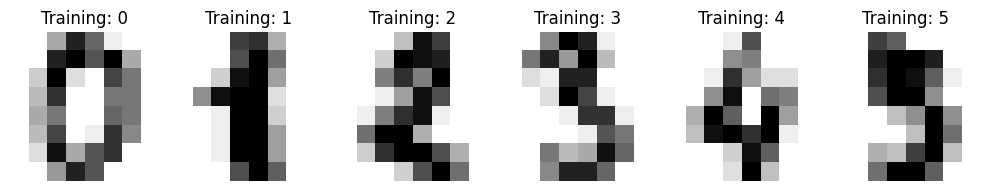

In [9]:
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(1, 6, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

plt.tight_layout()

We can then create a train-test data-split and fit our random forest classifier:


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2
)
clf = RandomForestClassifier()

As before we will use a grid search on model hyperparameters to try to find a good model. The
parameters here are:

- **`n_estimators`**: the number of trees to grow in the forest;

- **`max_features`**: the proportion of the feature set to consider at each node 

We can then see how well it does on the dedicated test data that it has never seen before:


In [13]:
param_search = {
    "n_estimators": [50, 100, 250],
    "max_features": [0.8, 0.5, 0.3],
}

output = GridSearchCV(
    clf, param_search, cv=10
)
output.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': [0.8, 0.5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


The best parameters and best accuracy score in the grid search are


In [14]:
print(output.best_params_)
print(output.best_score_)

{'max_features': 0.3, 'n_estimators': 50}
0.9735625485625485


We can then see how well it does on the dedicated test data that it has never seen before:


In [15]:
output.score(X_test, y_test)

0.9777777777777777

Below are some test images together with the model's classifications:


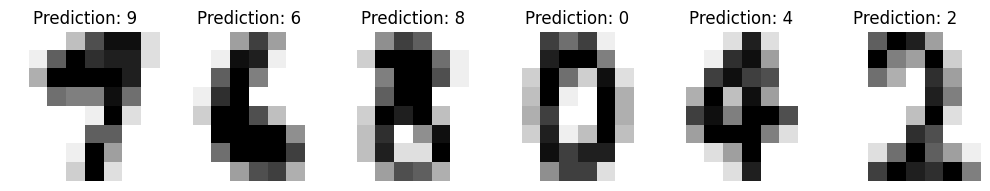

In [17]:
import matplotlib.pyplot as plt

predicted = output.predict(X_test[:6])

fig, axes = plt.subplots(1, 6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

plt.tight_layout()